In [142]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

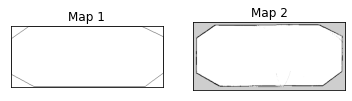

In [143]:
# 读取图像
map1 = cv2.imread('map1.png', 0)
map2 = cv2.imread('map2.png', 0)
# 显示图像
plt.subplot(121), plt.imshow(map1, cmap='gray')
plt.title('Map 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(map2, cmap='gray')
plt.title('Map 2'), plt.xticks([]), plt.yticks([])
plt.show()

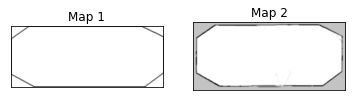

In [144]:
# 高斯模糊
map1 = cv2.GaussianBlur(map1, (5, 5), 0)
map2 = cv2.GaussianBlur(map2, (5, 5), 0)
# 显示图像
plt.subplot(121), plt.imshow(map1, cmap='gray')
plt.title('Map 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(map2, cmap='gray')
plt.title('Map 2'), plt.xticks([]), plt.yticks([])
plt.show()

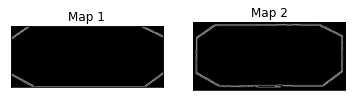

In [145]:
# 提取图像的边缘
map1_edge = cv2.Canny(map1, 100, 200)
map2_edge = cv2.Canny(map2, 100, 200)
# 显示图像
plt.subplot(121), plt.imshow(map1_edge, cmap='gray')
plt.title('Map 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(map2_edge, cmap='gray')
plt.title('Map 2'), plt.xticks([]), plt.yticks([])
plt.show()

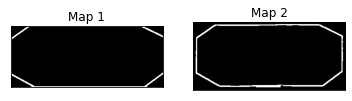

In [146]:
# 图像膨胀
kernel1 = np.ones((5, 5), np.uint8)
kernel2 = np.ones((3, 3), np.uint8)
map1_dilate = cv2.dilate(map1_edge, kernel1, iterations=1)
map2_dilate = cv2.dilate(map2_edge, kernel1, iterations=1)
# 图像腐蚀
map1_erode = cv2.erode(map1_dilate, kernel1, iterations=1)
map2_erode = cv2.erode(map2_dilate, kernel1, iterations=1)
# 显示图像
plt.subplot(121), plt.imshow(map1_erode, cmap='gray')
plt.title('Map 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(map2_erode, cmap='gray')
plt.title('Map 2'), plt.xticks([]), plt.yticks([])
plt.show()

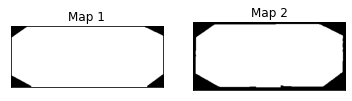

In [147]:
# 提取外层轮廓(RETR_EXTERNAL指只检测外轮廓)
map1_contours_all, hierarchy = cv2.findContours(map1_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
map2_contours_all, hierarchy = cv2.findContours(map2_erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# 取点数量到一定数量的轮廓
map1_contours = [c for c in map1_contours_all if len(c) > 100]
map2_contours = [c for c in map2_contours_all if len(c) > 100]
# 空白图像绘制彩色轮廓
map1_contours_img = np.zeros(map1.shape, np.uint8)
map2_contours_img = np.zeros(map2.shape, np.uint8)
cv2.drawContours(map1_contours_img, map1_contours, -1, (255, 255, 255), -1)
cv2.drawContours(map2_contours_img, map2_contours, -1, (255, 255, 255), -1)
# 显示图像
plt.subplot(121), plt.imshow(map1_contours_img, cmap='gray')
plt.title('Map 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(map2_contours_img, cmap='gray')
plt.title('Map 2'), plt.xticks([]), plt.yticks([])
plt.show()

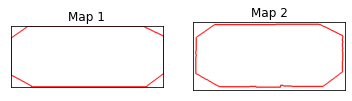

In [148]:
# 将轮廓转换为点集
map1_points = []
for contour in map1_contours:
    for point in contour:
        map1_points.append(point[0])
map2_points = []
for contour in map2_contours:
    for point in contour:
        map2_points.append(point[0])
# 三通道白色画布
map1_img = np.zeros((map1.shape[0], map1.shape[1], 3), np.uint8)
map2_img = np.zeros((map2.shape[0], map2.shape[1], 3), np.uint8)
map1_img[:, :, 0] = map1_img[:, :, 1] = map1_img[:, :, 2] = 255
map2_img[:, :, 0] = map2_img[:, :, 1] = map2_img[:, :, 2] = 255
# 以红色绘制点云
for point in map1_points:
    # 画圆
    cv2.circle(map1_img, point, 1, (0, 0, 255), -1)
for point in map2_points:
    # 画圆
    cv2.circle(map2_img, point, 1, (0, 0, 255), -1)
# 显示图像
# 转RBG图像
map1_img = cv2.cvtColor(map1_img, cv2.COLOR_BGR2RGB)
map2_img = cv2.cvtColor(map2_img, cv2.COLOR_BGR2RGB)
plt.subplot(121), plt.imshow(map1_img)
plt.title('Map 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(map2_img)
plt.title('Map 2'), plt.xticks([]), plt.yticks([])
plt.show()

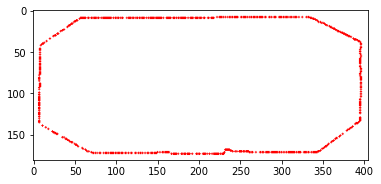

In [149]:
# 使用sklearn重采样
from sklearn.utils import resample
# 重采样点云2，使其点数与点云1相同
map2_points_resample = resample(map2_points, n_samples=len(map1_points))
# 绘制重采样点云
map2_points_resample_img = np.zeros((map2.shape[0], map2.shape[1], 3), np.uint8)
map2_points_resample_img[:, :, 0] = map2_points_resample_img[:, :, 1] = map2_points_resample_img[:, :, 2] = 255
for point in map2_points_resample:
    # 画圆
    cv2.circle(map2_points_resample_img, point, 1, (0, 0, 255), -1)
# 转RBG图像
map2_points_resample_img = cv2.cvtColor(map2_points_resample_img, cv2.COLOR_BGR2RGB)
plt.imshow(map2_points_resample_img)
plt.show()

In [150]:
# 导入icp包
import icp

In [151]:
# 将点云转换为numpy数组
map1_points_np = np.array(map1_points)
map2_points_np = np.array(map2_points_resample)
T, distances, iterations=icp.icp(map2_points_np, map1_points_np, tolerance=0.000001)

In [152]:
C = np.ones((len(map1_points),3))
C[:,0:2] = map2_points_np
# 使用T变换点云
map2_points_np_transformed = np.dot(T, C.T).T

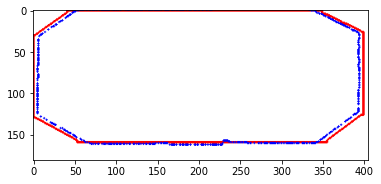

In [153]:
# 绘制变换后的点云
pointcloud_canvas = np.zeros((max(map1.shape[0],map2.shape[0]), max(map1.shape[1],map2.shape[1]), 3), np.uint8)
pointcloud_canvas[:, :, 0] = pointcloud_canvas[:, :, 1] = pointcloud_canvas[:, :, 2] = 255
# 绘制点云1
for point in map1_points:
    # 画圆
    cv2.circle(pointcloud_canvas, point, 1, (0, 0, 255), -1)
# 绘制点云2
for point in map2_points_np_transformed:
    # 画圆
    cv2.circle(pointcloud_canvas, (int(point[0]), int(point[1])), 1, (255, 0, 0), -1)
# 转RBG图像
map2_points_np_transformed_img = cv2.cvtColor(pointcloud_canvas, cv2.COLOR_BGR2RGB)
plt.imshow(map2_points_np_transformed_img)
plt.show()

In [154]:
# 输出average distance to the nearest neighbor (ADNN) 
print(distances)
print(distances.mean())

[2.41395093 1.75266298 6.71551789 ... 2.26558531 2.97758193 2.18255544]
3.0365661617684063
